<a href="https://colab.research.google.com/github/erthersany/IMDB-Analysis-/blob/main/Project_5_Data_Analysis_on_Olympics_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [65]:
#numpy
import numpy as np

#pandas
import pandas as pd

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#RegEx
import re

## Reading the Dataset
NOC: https://drive.google.com/file/d/15KJKTtlrvsILcPp9cASDm-AMhhv5Cq-G/view?usp=sharing

Athlete: https://drive.google.com/file/d/1stu-JrwFFcDRcFRMXtDDfhrX_ghOpuwD/view?usp=sharing

In [67]:
athlete = pd.read_csv("/content/athlete_events.csv")
noc = pd.read_csv("/content/noc_regions.csv")

## Creating the copy of the DataFrame

In [68]:
ath = athlete.copy()
nat = noc.copy()

## Data Exploration

In [69]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
ath.tail()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
79023,40128,Enrique Giaverini,M,27.0,NaN,NaN,Chile,CHI,1936 Summer,1936,Summer,Berlin,Boxing,Boxing Men's Welterweight,NaN
79024,40129,Luigina Giavotti,F,11.0,NaN,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver
79025,40130,Khristina Giazitzidou,F,22.0,168.0,59.0,Greece,GRE,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Lightweight Double Sculls,Bronze
79026,40131,"Gilberto Amauri ""Giba"" de Godoy Filho",M,23.0,192.0,85.0,Brazil,BRA,2000 Summer,2000,Summer,Sydney,Volleyball,Volleyball Men's Volleyball,NaN
79027,40131,"Gilberto Amauri ""Giba"" de Godoy Filho",M,27.0,192.0,85.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,NaN,NaN,NaN


In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79028 entries, 0 to 79027
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      79028 non-null  int64  
 1   Name    79028 non-null  object 
 2   Gender  79028 non-null  object 
 3   Age     75966 non-null  float64
 4   Height  60796 non-null  float64
 5   Weight  59837 non-null  float64
 6   Team    79028 non-null  object 
 7   NOC     79028 non-null  object 
 8   Games   79028 non-null  object 
 9   Year    79028 non-null  int64  
 10  Season  79028 non-null  object 
 11  City    79028 non-null  object 
 12  Sport   79027 non-null  object 
 13  Event   79027 non-null  object 
 14  Medal   11023 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 9.0+ MB


In [ ]:
ath.describe()

,ID,Age,Height,Weight,Year
count,79028.000000,75966.000000,60796.000000,59837.000000,79028.000000
mean,20341.377866,25.619290,175.471051,70.822618,1977.764235
std,11514.061590,6.458249,10.403527,14.166638,30.119813
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,10411.000000,21.000000,168.000000,61.000000,1960.000000
50%,20330.500000,24.000000,175.000000,70.000000,1984.000000
75%,30361.000000,28.000000,183.000000,79.000000,2002.000000
max,40131.000000,88.000000,223.000000,214.000000,2016.000000


In [ ]:
ath.shape

(79028, 15)

In [ ]:
ath.isnull().sum()

ID            0
Name          0
Gender        0
Age        3062
Height    18232
Weight    19191
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         1
Event         1
Medal     68005
dtype: int64

## Data Cleaning & Data Manipulation

1. Add a new column "region" to the ath DataFrame. And the region column should have the regions according to the elements in the NOC columns of the "nat" DataFrame.

In [70]:
region_col = ath["NOC"].map(nat.set_index('NOC')['region'])
ath.insert(7,'region',region_col)

In [ ]:
ath

,ID,Name,Gender,Age,Height,Weight,Team,region,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79023,40128,Enrique Giaverini,M,27.0,NaN,NaN,Chile,Chile,CHI,1936 Summer,1936,Summer,Berlin,Boxing,Boxing Men's Welterweight,NaN
79024,40129,Luigina Giavotti,F,11.0,NaN,NaN,Italy,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver
79025,40130,Khristina Giazitzidou,F,22.0,168.0,59.0,Greece,Greece,GRE,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Lightweight Double Sculls,Bronze
79026,40131,"Gilberto Amauri ""Giba"" de Godoy Filho",M,23.0,192.0,85.0,Brazil,Brazil,BRA,2000 Summer,2000,Summer,Sydney,Volleyball,Volleyball Men's Volleyball,NaN


2. Drop the column "NOC" from DataFrame "ath"

In [71]:
ath.drop(columns=['NOC'],inplace = True)

In [ ]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


3. Handling the null values in the columns - "Age", "Height" & "Weight" by the mean of the respective columns.

In [ ]:
ath.isnull().sum()

ID            0
Name          0
Gender        0
Age        3062
Height    18232
Weight    19191
Team          0
region       69
Games         0
Year          0
Season        0
City          0
Sport         1
Event         1
Medal     68005
dtype: int64

In [ ]:
ath[ath.Age.isnull()].head()

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal


In [72]:
ath['Age'].fillna(ath.Age.mean(),inplace = True)
ath['Height'].fillna(ath.Height.mean(),inplace = True)
ath['Weight'].fillna(ath.Weight.mean(),inplace = True)

In [ ]:
ath.isnull().sum()

ID            0
Name          0
Gender        0
Age           0
Height        0
Weight        0
Team          0
region       69
Games         0
Year          0
Season        0
City          0
Sport         1
Event         1
Medal     68005
dtype: int64

4. List out all the values of the region columns where the values are null.

In [14]:
ath[ath.region.isnull()].head()

,ID,Name,Gender,Age,Height,Weight,Team,region,NOC,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21.0,175.432721,70.995076,Singapore,NaN,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN
579,332,Zarinah Abdullah,F,25.0,175.432721,70.995076,Singapore,NaN,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.000000,68.000000,Singapore,NaN,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
6267,3515,Paulo Amotun Lokoro,M,24.0,170.000000,61.000000,Refugee Olympic Athletes,NaN,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7659,4264,Ang Peng Siong,M,21.0,180.000000,75.000000,Singapore,NaN,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN


In [18]:
nat.where(nat['region']=='singapore')

,NOC,region,notes
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
225,NaN,NaN,NaN
226,NaN,NaN,NaN
227,NaN,NaN,NaN
228,NaN,NaN,NaN


5. Handling the null values in the column "Medals"

In [20]:
ath.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [21]:
ath.Medal.value_counts()

Medal
Gold      689
Bronze    675
Silver    655
Name: count, dtype: int64

In [73]:
ath.Medal =ath['Medal'].fillna('0',inplace = True)
ath['Medal'].replace('Gold',1,inplace = True)
ath['Medal'].replace('Silver',2,inplace = True)
ath['Medal'].replace('Bronze',3,inplace = True)

In [36]:
ath.Medal=ath['Medal'].replace([np.nan],[0], inplace=True)

In [40]:
ath.Medal

0        None
1        None
2        None
3        None
4        None
         ... 
15968    None
15969    None
15970    None
15971    None
15972    None
Name: Medal, Length: 15973, dtype: object

In [44]:
ath.Medal.isnull().sum()

0

6. dropping off the un-wanted/irrelavant columns

In [74]:
ath =ath.drop(columns=['region','Games'])

In [66]:
ath.head()

0    24
1    23
2    24
3    34
4    21
Name: Age, dtype: int64

7. Remove the unwanted phrases from the "Event" column

In [54]:
ath.Event.head()

0         Basketball Men's Basketball
1        Judo Men's Extra-Lightweight
2             Football Men's Football
3         Tug-Of-War Men's Tug-Of-War
4    Speed Skating Women's 500 metres
Name: Event, dtype: object

In [54]:
re.sub('','',ath.Event)

In [75]:
for i,j  in zip(ath.Sport,range(len(ath.Sport))):
  ath.Event[j] = re.sub(f'{i}\s','',ath.Event[j])

Streaming output truncated to the last 5000 lines.
<ipython-input-75-2e30d210f521>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath.Event[j] = re.sub(f'{i}\s','',ath.Event[j])
<ipython-input-75-2e30d210f521>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath.Event[j] = re.sub(f'{i}\s','',ath.Event[j])
<ipython-input-75-2e30d210f521>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath.Event[j] = re.sub(f'{i}\s','',ath.Event[j])
<

In [56]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992,Summer,Barcelona,Basketball,Men's Basketball,None
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012,Summer,London,Judo,Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,175.432721,70.995076,Denmark,DEN,1920,Summer,Antwerpen,Football,Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,175.432721,70.995076,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Men's Tug-Of-War,None
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Women's 500 metres,None


In [61]:
ath.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15973 entries, 0 to 15972
Series name: Age
Non-Null Count  Dtype
--------------  -----
15973 non-null  int64
dtypes: int64(1)
memory usage: 124.9 KB


## Exportation of the DataFrame

In [ ]:
# Export to JSON
ath.to_json("athletes_dataset.json")

# Export to Excel
ath.to_excel("athletes_dataset.xlsx")

# Export to .CSV
ath.to_csv("athletes_dataset.csv")

## Data Analysis

1. Show the relationship between Height and Weight

Text(0, 0.5, 'Weight')

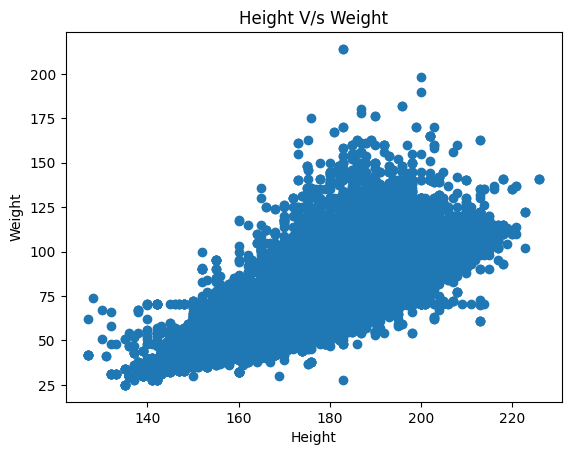

In [76]:
x = ath.Height
y = ath.Weight
plt.scatter(x,y)
plt.title("Height V/s Weight")
plt.xlabel("Height")
plt.ylabel("Weight")

2. Find out how many male and female had participated in the Olympics during 1896 to 2016

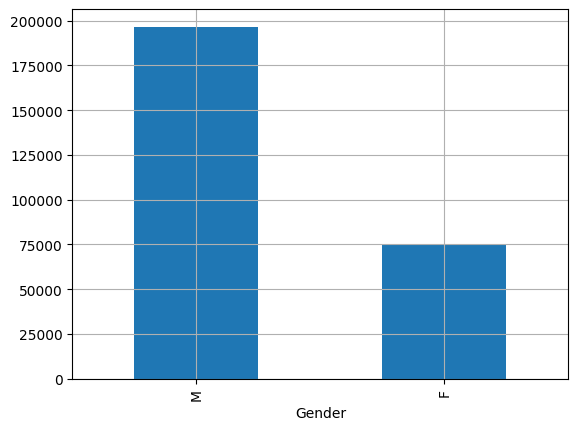

In [81]:
ath['Gender'].value_counts().plot.bar(ath['Gender'])
plt.grid()

3. How many Male and Female have participated in the Summer and Winter Olympics

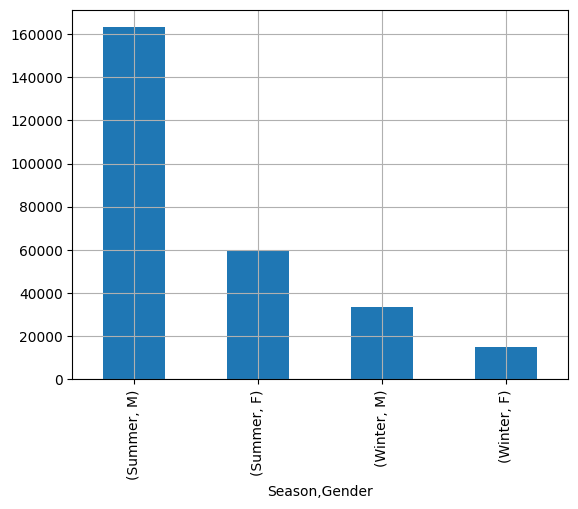

In [84]:
ath['Gender'].groupby(ath['Season']).value_counts().plot.bar(ath['Gender'])
plt.grid()
plt.show()

In [85]:
import plotly.express as px

In [86]:
fig = px.histogram(ath, x=ath.Season, color=ath.Gender, barmode = "group",
                   color_discrete_map={"M":"#BA55D3", "F":"#DEB887"})
fig.show()

4. Name the Top 5 countries who have the most medals

In [89]:
(ath.groupby(ath['Team'])['Medal'].sum()).sort_values(ascending=False).head(5)

Team
30. Februar                           0
Phalainis ton Thorichtou "Hydra"-2    0
Peru                                  0
Persey                                0
Peri II                               0
Name: Medal, dtype: object